## Hotel Booking Dataset

**Dataset Link :**  https://www.kaggle.com/datasets/mojtaba142/hotel-booking/data

**Analytical Question: From the hotel dataset, we can extract booking information, such as the peak hotel booking
period. What are the reasons behind the customer's decision to cancel their hotel
reservation? Which type of hotel—a city hotel or a resort hotel, in my case—do they prefer
most? What kind of food do they like best, and which company or agencies get the most
reservations? We are able to find out which kind of deposit the majority of our clients
choose, as well as whether they are returning visitors. We can also examine the average
number of adults, kids, and infants that check into the hotel, as well as the nation from
which the most and least booking happen. And we are able to contrast the hotel rates in
each period.**

**The primary question is that which factors are driving customers in cancelation of hotel booking and also the factors that helps the hotel in understanding the customer requirements for better booking rate.**

In [452]:
# Importing Necessary Libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import warnings   #( Referenced Stack Overflow)
import time
warnings.filterwarnings('ignore')
%matplotlib inline

In [453]:
# Establishing connection between Colab Notebook and Google Drive

from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [454]:
# Changing the current working directory from '/content/drive' to 'PDA_Project' folder

%cd "/content/drive/My Drive/Colab_PDA/PDA_Project"

/content/drive/My Drive/Colab_PDA/PDA_Project


## Reading and Understanding the Data.

In [455]:
# Read the data from the CSV file 'hotel_booking.csv' into Pandas DataFrame named hotel_df.

hotel_df = pd.read_csv('hotel_booking.csv')

In [456]:
# making a copy of DataFrame from hotel_df to df.

df = hotel_df

# Displaying contents of df
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


In [457]:
print('The Hotel Dataset contains', df.shape[0],'rows',df.shape[1],'columns')

The Hotel Dataset contains 119390 rows 36 columns


In [458]:
# Displaying Columns names present in Hotel DataSet.

df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [459]:
# Using info method to obtain number of columns, column labels, column data types, memory usage, range index, and non-null values (w3schools.com)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

**In the above code , we use info() to get the number of columns, their data types, memory use, and the number of non-null values. This function allows us to understand data types and analyze columns with null values as well as non null values.And, as we can see from the above code output, a few columns have irrelevant data types associated with them, as well as a few irrelevant columns, which may cause issues in future analysis. So, throughout the data cleaning process, we might address this issue using numerous ways.**


**The output contains 36 columns and 119390 rows. They are of the float, integer, and object data types, with a memory utilization of 32.8+ MB.**

In [460]:
# The head method returns the first five rows of the dataframe.

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [461]:
# The tail method returns the last five rows of the dataframe.

df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,Transient,151.20,0,2,Check-Out,2017-09-07,Ariana Michael,Ariana_M@xfinity.com,422-804-6403,************4482


In [462]:
# The describe() method returns a description of the data in the DataFrame, which in this case is only applicable to numerical data. (W3 school)

df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


**Using the describe method, we can learn about the statistics of each column, such as the minimum, maximum, count, standard deviation, and 25%, 50%, and 75% of the values in that column. However, for statistical purposes, this method only considers numerical data type columns and excludes other data types.The above code output for the lead time column yields a total of 119390 rows with 104 as the mean value, zero as the least value, and 737 as the maximum value in the column. 25% of the data has a value of 18, 50% have 69, and 75% have 160 within that column.**


In [463]:
# Here we are checking descriptive statistics for columns with object data type in the DataFrame.

df.describe(include='object').T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


In [464]:
# Each column of the object data type is printed with its unique value.

for col in df.describe(include='object'):
  print(col)
  print(df[col].unique())
  print("----------------------------------------------------")

hotel
['Resort Hotel' 'City Hotel']
----------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
----------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
----------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'C

**The preceding output shows that the reservation_status_date column is of object type, therefore no further actions, such as selecting a month, year, or date, may be performed on it. In addition, there are a few PII columns that don't need to be included for analysis.**

## Data Preprocessing and Data Cleaning.

In [465]:
# Here, we transform the resrvation_date_time object data type to a DateTime object.

df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [466]:
# We are removing columns with names, emails, phone numbers, and credit cards because we are not able to conduct any analysis on personal data.

df.drop(columns=['name','email','phone-number','credit_card'],axis = 1,inplace=True)


In [467]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

**The preceding info() method output confirms that the reservation_status_date data type is changed to a datetime object, and PII columns are deleted from the dataframe.**

In [468]:
# Counting the missing (NaN) values in each column of the DataFrame df.

df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

**The above output shows that the children, country, agent, and company columns have null values.**

In [469]:
# Sorting the columns by the number of null values and only considering 10 rows because all other columns are zero.

df.isna().sum().sort_values(ascending=False)[:10]

company                   112593
agent                      16340
country                      488
children                       4
reserved_room_type             0
assigned_room_type             0
booking_changes                0
deposit_type                   0
hotel                          0
previous_cancellations         0
dtype: int64

### Handling Missing Data.

In [470]:
# Filling up missing values in the dataframe's 'children' column using the column 'mean'.

df['children'].fillna(df['children'].mean(),inplace=True)

**We are imputing the mean value to the missing rows of the children column since it is appropriate for analysis rather than removing those rows.**

In [471]:
# Filling up missing values in the dataframe's 'company' column with 'zero' as value.

df['company'].fillna(0,inplace=True)

**We must deal with these missing data because the company column contains the greatest number of missing entries. assuming that the customers may not have made their hotel reservation through a company, in this instance, we are substituting zero for these missing fields.**

In [472]:
# Filling up missing values in the dataframe's 'agent' column with 'zero' as value

df['agent'].fillna(0,inplace=True)

**We need to handle the missing data in the agent column as well. We assume that the customers did not book the hotel through an agent or corporation, thus we replace missing data with zero.**

In [473]:
# Filling up missing values in the dataframe's 'country' column with 'Others' as value.

df['country'].fillna('Others',inplace=True)

**The country column in the dataset has missing values. Because the Country column has a string datatype, computation methods such as mean, mode, and median are ineffective for filling these values. We consider value as 'others' because no alternative technique is appropriate for filling these missing data.**


In [474]:
# Again Checking the missing (NaN) values in each column of the DataFrame df after imputation process for null columns.

df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [475]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,...,0.087118,0.137097,0.221124,74.828319,10.775157,2.321149,101.831122,0.062518,0.571363,2016-07-30 00:24:47.883407104
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.290000,0.000000,0.000000,2016-02-01 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.575000,0.000000,0.000000,2016-08-07 00:00:00
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-08 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,...,0.844336,1.497437,0.652306,107.141953,53.943884,17.594721,50.535790,0.245291,0.792798,NaN


In [476]:
# According to the dataframe description, the rows for adults, newborns, and children are all zero. So, checking at the dataframe to determine if all of these row values are 0 at once.

df[((df.adults == 0) & (df.babies == 0) & (df.children == 0))]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,2017-06-30
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,2017-07-01
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,2017-07-17
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22


**Based on the above output, we may conclude that adults, babies, and children are all zero at the same time, which is impossible because no one has checked into the hotel, but there are data points available that will influence further data analysis.**

In [477]:
# At the same time, the values in the adult, babies, and children columns cannot be zero. We are removing those records because they may have an impact on future analyses.

df = df[~((df.adults == 0) & (df.babies == 0) & (df.children == 0))]

In [478]:
df.shape

(119210, 32)

**We can now validate that 160 rows have been eliminated from the dataframe, reducing the number of rows from 119390 to 119210.**

In [479]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119210 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119210 non-null  object        
 1   is_canceled                     119210 non-null  int64         
 2   lead_time                       119210 non-null  int64         
 3   arrival_date_year               119210 non-null  int64         
 4   arrival_date_month              119210 non-null  object        
 5   arrival_date_week_number        119210 non-null  int64         
 6   arrival_date_day_of_month       119210 non-null  int64         
 7   stays_in_weekend_nights         119210 non-null  int64         
 8   stays_in_week_nights            119210 non-null  int64         
 9   adults                          119210 non-null  int64         
 10  children                        119210 non-null  float64     

In [480]:
# Changing the datatype of columns 'children', 'company', and 'agent' from float to int. These columns cannot contain float values.


df[['children', 'company', 'agent']] = df[['children', 'company', 'agent']].astype('int64')

**Feature Engineering**

In [481]:
# Total hotel stay days are calculated by combining stays_in_week_nights and stays_in_weekend_nights.

df['total_stay'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']

# Adding total people num as a column, i.e., total people num = the number of adults + children + babies

df['total_people'] = df['adults']+df['babies']+df['children']

**Using feature engineering, we are creating new columns such as total_stay and total_people for correlation reasons, which will be useful in mapping the correlation with other columns.**

In [482]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119210 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119210 non-null  object        
 1   is_canceled                     119210 non-null  int64         
 2   lead_time                       119210 non-null  int64         
 3   arrival_date_year               119210 non-null  int64         
 4   arrival_date_month              119210 non-null  object        
 5   arrival_date_week_number        119210 non-null  int64         
 6   arrival_date_day_of_month       119210 non-null  int64         
 7   stays_in_weekend_nights         119210 non-null  int64         
 8   stays_in_week_nights            119210 non-null  int64         
 9   adults                          119210 non-null  int64         
 10  children                        119210 non-null  int64       

**The preceding info() output shows that all of the essential float data types have been converted to int data types, and two new columns, total_stay and total_people, have been added for improved analysis.**

## **Exploratory Data Analysis (EDA) and Data Visulization**

**First, we will determine the correlation between the numerical data.**

In [483]:
# Selecting the columns needed for the correlation from the dataframe 'df' and assigning them to the new 'corr_df' dataframe.

corr_df = df[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','total_stay','total_people']]

**We are not looking for correlation in columns like "is_cancelled," "arrival_date_year," "arrival_date_week_number," "arrival_date_of_month," "is_repeated_guest," "company," and "agent" because they are categorical data with numerical types.**

**The total_stay and total_people columns have also been introduced. Therefore, the columns for stays in weekend nights, stays in week nights, adults, babies, and children can be removed.**

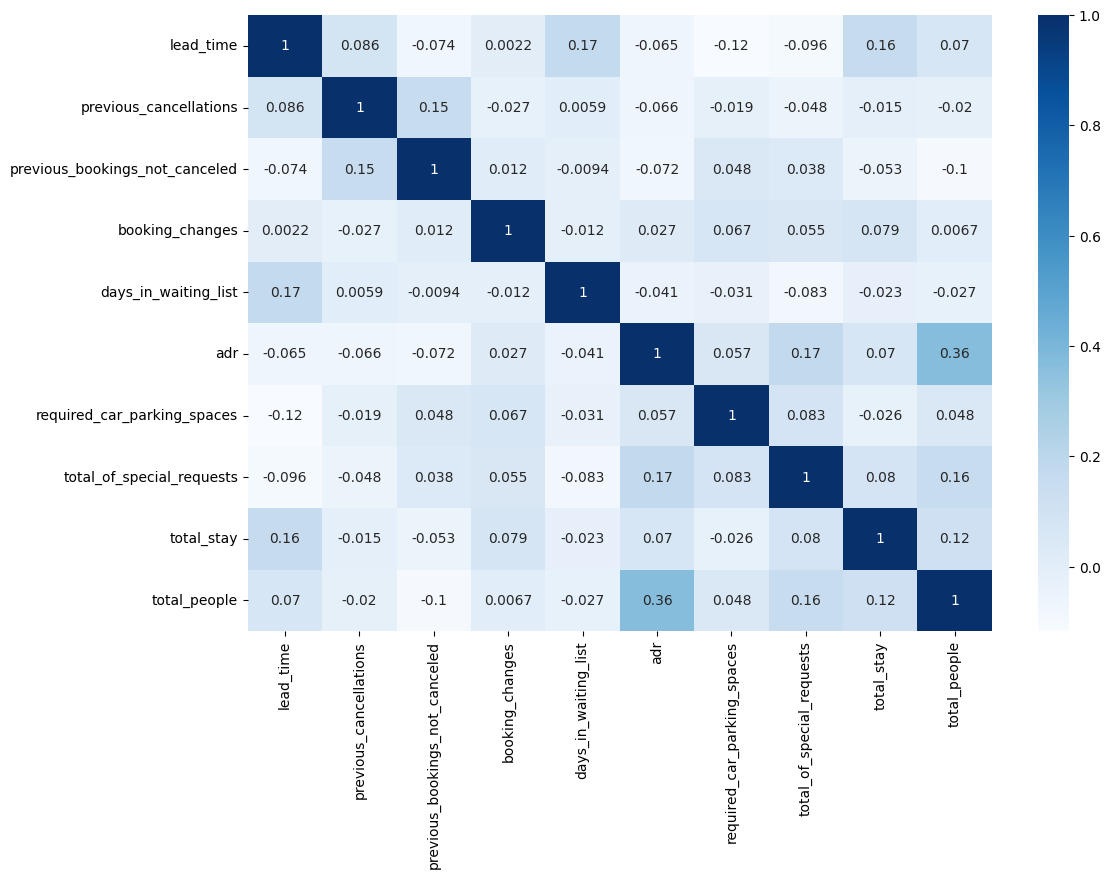

In [484]:
#correlation matrix

# computing coreraltion matrix for the DataFrame corr_df using corr().
cor_matrix = corr_df.corr()

# specifying the size of the heatmap figure using matplotlib library.
plt.figure(figsize=(12, 8))

# Using seaborn creating a heatmap vizualization.
sns.heatmap(cor_matrix,cmap = 'Blues',annot = True);

▶ Days on the waiting list have a small correlation with lead time. This means
   that the longer the lead time, the shorter the time on the waiting list.


▶ The total length of stay and lead time are slightly correlated. This could
   imply that for lengthier hotel stays, guests often plan little before their arrival.

▶ Adr is marginally associated with total_people, which makes sense given that
   a bigger number of people equals more revenue and hence more adr.





### **Is the number of days on the customer's waiting list affected by lead time?**

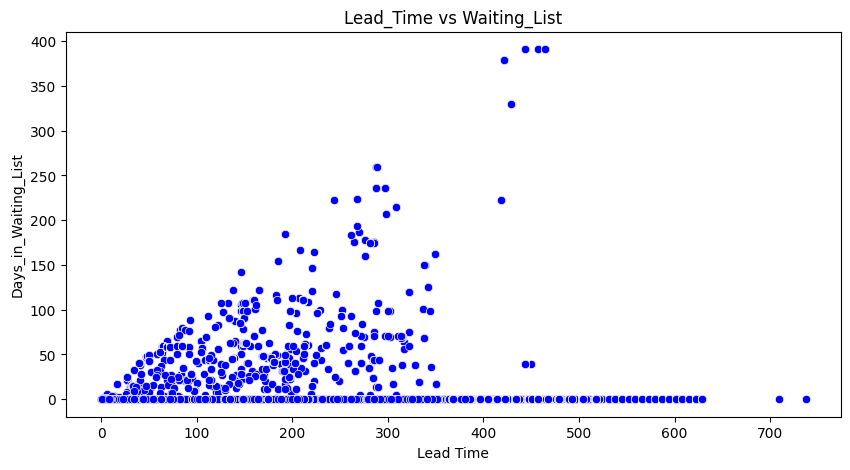

In [485]:
# specifying the size of the scatterplot figure using matplotlib library.
plt.figure(figsize = (10,5))

# Using seaborn creating a scatter plot of lead_time for x-axis and days_in waiting list for y-axis.
sns.scatterplot(y = 'days_in_waiting_list', x='lead_time',data = df,color='blue')

# labelling y-axis.
plt.ylabel('Days_in_Waiting_List')

# labelling x-axis.
plt.xlabel('Lead Time')

# providing title for the scatter plot.
plt.title('Lead_Time vs Waiting_List', size = 12)

# Using show() to display figures.
plt.show()

**Based on the above plot, we may conclude that with a shorter lead time, the customer may have to wait for a longer period of time.For example, if a guest makes a reservation with very little notice (less lead time), the hotel may have limited availability or may need to hustle to prepare the room, perhaps causing check-in or room ready delays.**

### **Is the length of stay affect the average daily rate..?**

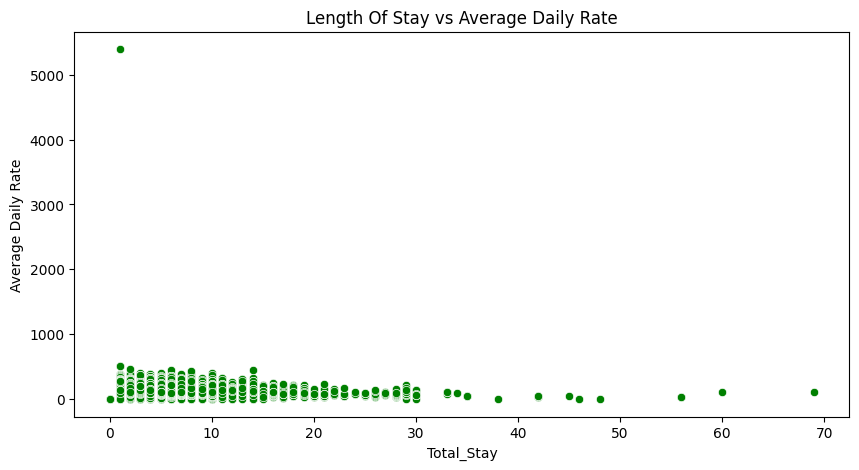

In [486]:
# specifying the size of the scatterplot figure using matplotlib library.
plt.figure(figsize = (10,5))

# Using seaborn creating a scatter plot of total_stay for x-axis and adr for y-axis.
sns.scatterplot(x = 'total_stay', y='adr',data = df,color='green')

# labelling x and y-axis.
plt.xlabel('Total_Stay')
plt.ylabel('Average Daily Rate')

# providing title for the scatter plot.
plt.title('Length Of Stay vs Average Daily Rate', size = 12)

# Using show() to display figures.
plt.show()

**Since such a high rate is not achievable, there is an anomaly in the ADR. So we'll remove it for better analysis.**


In [487]:
# Dropping rows where adr is greater than 5000.

df.drop(df[df['adr'] > 5000].index, inplace = True)

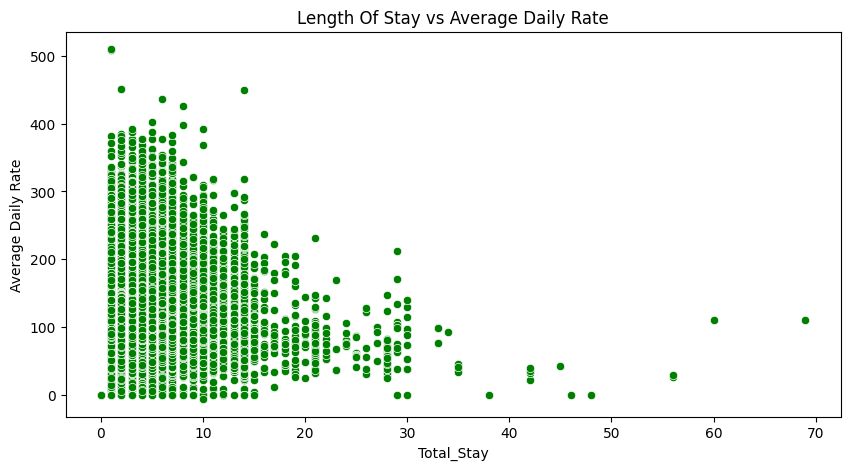

In [488]:
# specifying the size of the scatterplot figure using matplotlib library.
plt.figure(figsize = (10,5))

# Using seaborn creating a scatter plot of 'total_stay' for x-axis and 'adr' for y-axis.
sns.scatterplot(x = 'total_stay', y='adr',data = df,color='green')

# labelling x and y-axis.
plt.xlabel('Total_Stay')
plt.ylabel('Average Daily Rate')

# providing title for the scatter plot with specifying the font size.
plt.title('Length Of Stay vs Average Daily Rate', size = 12)

# Using show() to display figures.
plt.show()

**The following chart shows that as the length of the total stay grows, the average daily rate drops. This suggests that the customer can obtain a better deal if he or she stays longer.**

### **Is the total number of people affect the average daily rate..?**

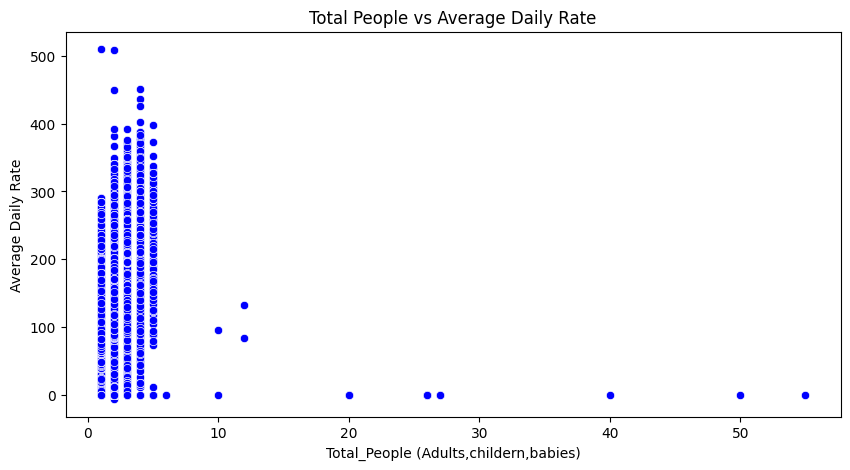

In [489]:
# specifying the size of the scatterplot figure using matplotlib library.
plt.figure(figsize = (10,5))

# Using seaborn creating a scatter plot of 'total_people' for x-axis and 'adr' for y-axis.
sns.scatterplot(x = 'total_people', y='adr',data = df,color='blue')

# labelling x and y-axis.
plt.xlabel('Total_People (Adults,childern,babies)')
plt.ylabel('Average Daily Rate')

# providing title for the scatter plot with specifying the font size.
plt.title('Total People vs Average Daily Rate', size = 12)

# Using show() to display figures.
plt.show()

**I see a few outliers in the plot, which is an indication of uncertainty, so removing them for a more accurate analysis.**



In [490]:
# Dropping rows where total people is greater than 10.

df.drop(df[df['total_people'] > 10].index, inplace = True)

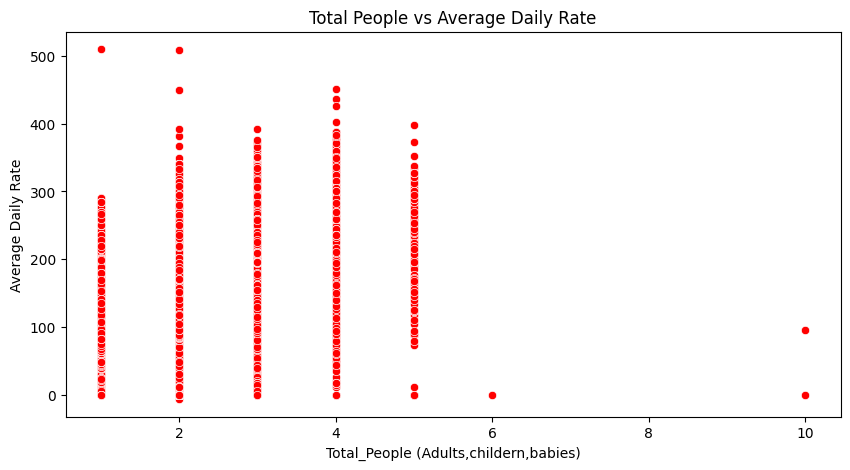

In [491]:
# specifying the size of the scatterplot figure using matplotlib library.
plt.figure(figsize = (10,5))

# Using seaborn creating a scatter plot of 'total_people' for x-axis and 'adr' for y-axis.
sns.scatterplot(x = 'total_people', y='adr',data = df,color='red')

# labelling x and y-axis.
plt.xlabel('Total_People (Adults,childern,babies)')
plt.ylabel('Average Daily Rate')

# providing title for the scatter plot with specifying the font size.
plt.title('Total People vs Average Daily Rate', size = 12)

# Using show() to display figures.
plt.show()

**The plot above shows that as the number of people increases, so does the average daily rate. except a few outliers.**

### **What is the hotel's reservation status count?**

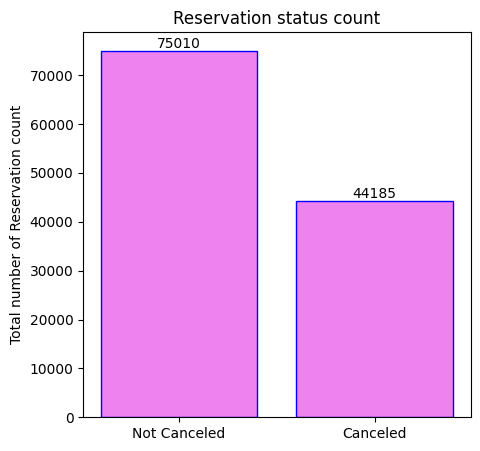

In [492]:
# Plotting Reservation Status Count of Hotels i.e Cancelled and Not cancelled Numbers.

# specifying the size of the bar plot figure using matplotlib library.
plt.figure(figsize=(5,5))

# providing title for the bar plot.
plt.title('Reservation status count')

# Using matplotlib library creating a bar plot of 'cancelled' and 'not cancelled' for x-axis and 'count values' for y-axis.
rsc = plt.bar(['Not Canceled','Canceled'],df['is_canceled'].value_counts(),edgecolor = 'blue',color = 'violet')    # Stack overflow

# labelling bar graphs with their actual counts and label.
plt.bar_label(rsc)       #stack overflow

# labelling y-axis
plt.ylabel('Total number of Reservation count')

# Using show() to display figures.
plt.show()

The resulting graph shows that over 37% of the reservations are cancelled. From these, we cannot determine which hotels have a high cancellation and booking rate.

### **What is the number of reservations at the resort hotel?**

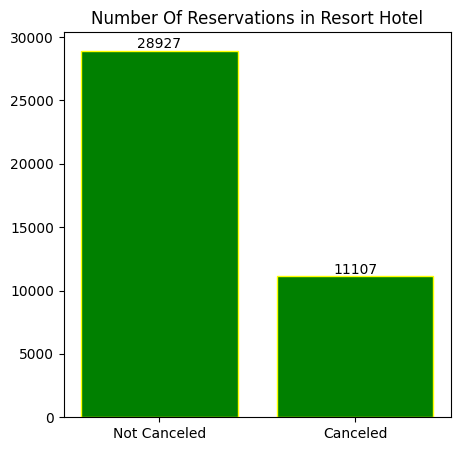

In [493]:
# Plotting Number Of Reservations in Resort Hotel

# Filtering out Resort Hotel
resort_hotel = df[df['hotel'] == 'Resort Hotel']

# specifying the size of the bar plot figure using matplotlib library.
plt.figure(figsize=(5,5))

# providing title for the bar plot.
plt.title('Number Of Reservations in Resort Hotel')

# Using matplotlib library creating a bar plot of 'cancelled' and 'not cancelled' for x-axis and 'count values' of resort hotel for y-axis.
rsc = plt.bar(['Not Canceled','Canceled'],resort_hotel['is_canceled'].value_counts(),edgecolor = 'yellow',color = 'green')

# labelling bar graphs with their actual counts and label.
plt.bar_label(rsc)

# Using show() to display figures.
plt.show()

**The following graph shows that around 72% (28927) have not cancelled their booking, whereas 28% (11120) have.**

### **What is the number of reservations at the City hotel?**

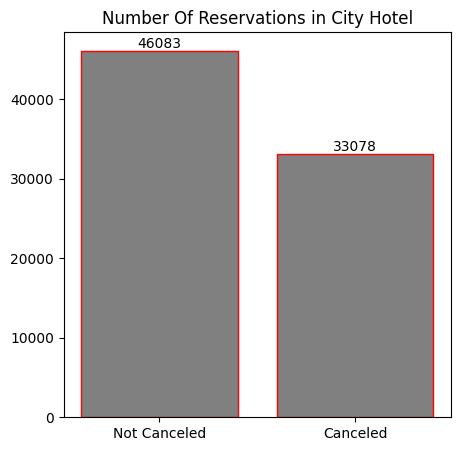

In [494]:
#Plotting Number Of Reservations in City Hotel

# Filtering out Resort Hotel
city_hotel = df[df['hotel'] == 'City Hotel']

# specifying the size of the bar plot figure using matplotlib library.
plt.figure(figsize=(5,5))

# providing title for the bar plot.
plt.title('Number Of Reservations in City Hotel')

# Using matplotlib library creating a bar plot of 'cancelled' and 'not cancelled' for x-axis and 'count values' of city hotel for y-axis.
rsc = plt.bar(['Not Canceled','Canceled'],city_hotel['is_canceled'].value_counts(),edgecolor = 'red',color = 'grey')

# labelling bar graphs with their actual counts and label.
plt.bar_label(rsc)

# Using show() to display figures.
plt.show()

**The following graph shows that around 58% (46084) have not cancelled their booking, whereas 42% (11120) have.**

**Conclusion: Based on the previous reservation study findings, we may conclude that more cancellations occur in city hotels.**


### **Which agent is making the most bookings?**

In [495]:
# Grouping by agent column and renaming columns and getting top 10 agents.

agent_booking = df['agent'].value_counts().reset_index().rename(columns = {'count':'number_of_bookings','index' : 'agent'})[:10]

agent_booking

,agent,number_of_bookings
0,9,31921
1,0,16273
2,240,13922
3,1,7187
4,14,3633
5,7,3532
6,6,3290
7,250,2870
8,241,1721
9,28,1657


<Axes: title={'center': 'Top 10 Agents based on their booking'}, xlabel='Agents', ylabel='Number_Of_bookings'>

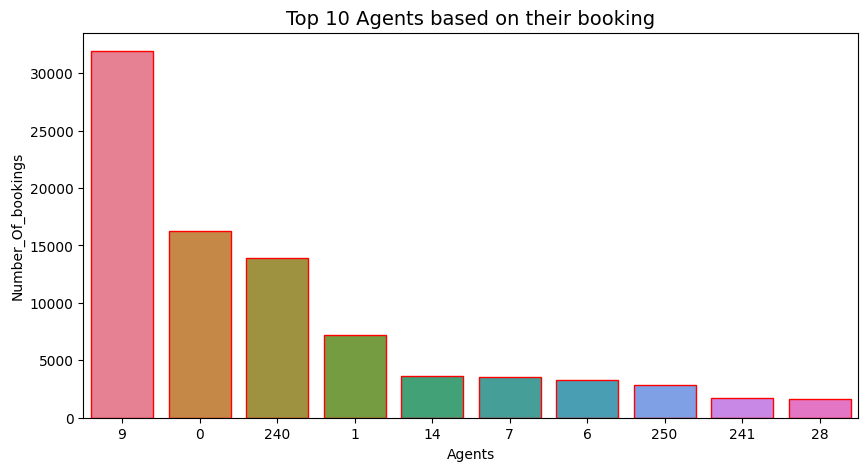

In [496]:
# Plotting Top 10 Agents based on their number of bookings.

# specifying the size of the bar plot figure using matplotlib library.
plt.figure(figsize = (10,5))

# providing title for the bar plot.
plt.title('Top 10 Agents based on their booking',size=14)

# labelling x and y-axis.
plt.xlabel('Agents')
plt.ylabel('Number_Of_bookings')

# Using seaborn creating a bar plot of 'agent' for x-axis and 'number_of_bookings' for y-axis (Referenced stackoverflow).
sns.barplot(x = 'agent', y = 'number_of_bookings', data = agent_booking ,palette='husl',edgecolor = 'red',order=agent_booking.sort_values('number_of_bookings',ascending = False).agent)

**The graph above demonstrates that agent 9 makes most of the bookings, and that the majority of bookings are made by individuals who avoid using an agent or company to book i.e., direct booking.**

**Conclusion: Hotels can provide offers or discounts to customers who book directly rather than through an agent or the company. so that hotels can increase their revenue by reducing commissions paid to agents or companies.
Customers would be satisfied, and the hotel would benefit from free marketing.**

### **Which room types are most frequently booked or assigned?**

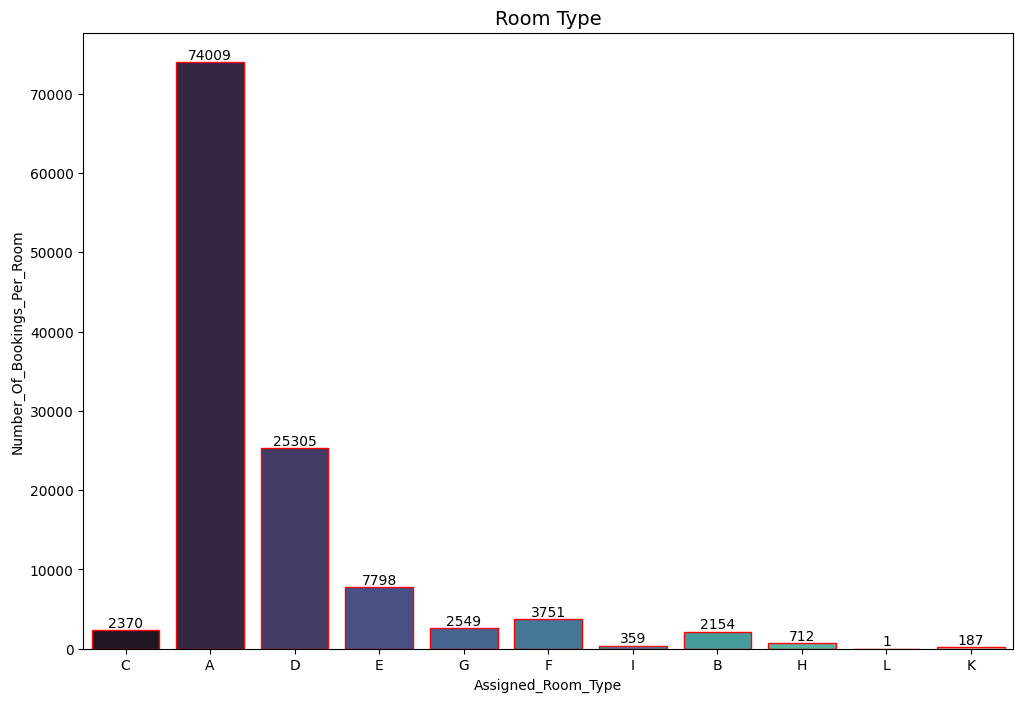

In [497]:
# Plotting number of bookings based on assigned room type

# specifying the size of the bar plot figure using matplotlib library.
plt.figure(figsize = (12,8))


# Using seaborn creating a countplot of 'assigned_room_type' for x-axis and 'number_of_bookings' for y-axis.
ax = sns.countplot(x = 'assigned_room_type',data = df,palette= 'mako', edgecolor = 'red')

# here we are labelling each bar with their actual number of bookings.
for container in ax.containers:
    ax.bar_label(container)

# providing title for the countplot.
plt.title('Room Type',size=14)

# labelling x and y-axis.
plt.xlabel('Assigned_Room_Type')
plt.ylabel('Number_Of_Bookings_Per_Room')

# Using show() to display figures.
plt.show()

**According to the above box plot, the most wanted room kinds are Rooms A and D, hence these room types should be increased.So, that hotels have better chances of making higher revenue.**

### **Which room types are most frequently assigned for each hotel?**

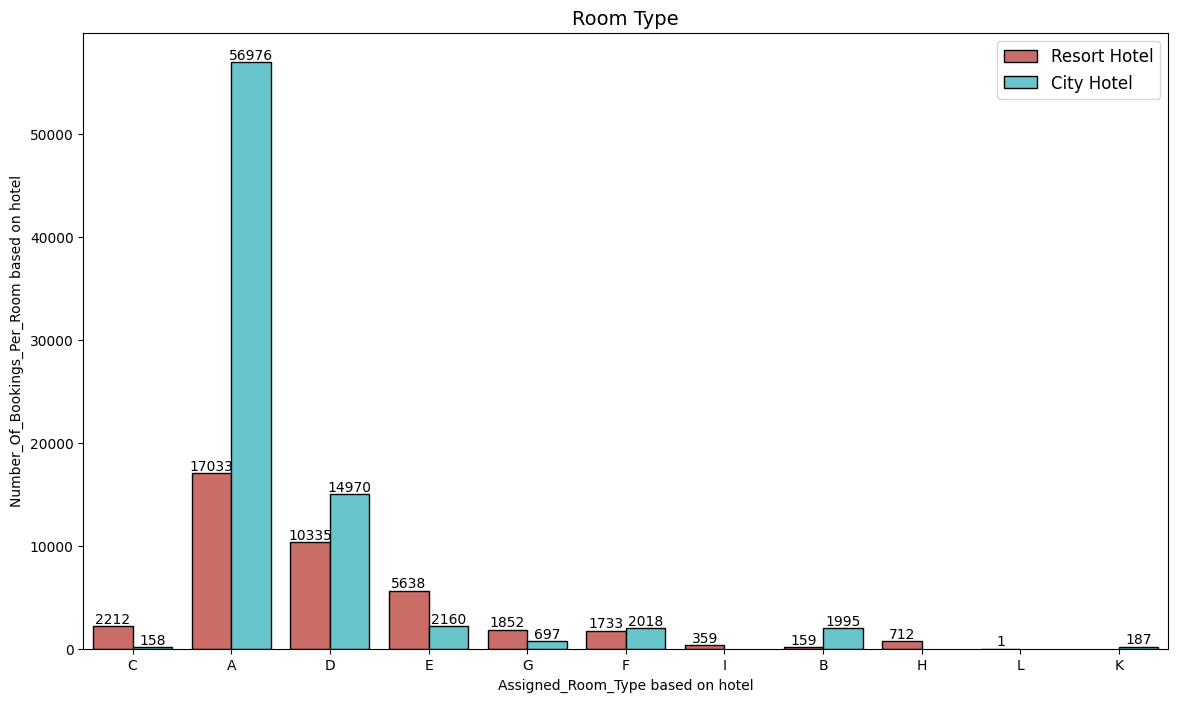

In [498]:
# Plotting number of bookings based on assigned room type for each hotel.

# specifying the size of the bar plot figure using matplotlib library.
plt.figure(figsize = (14,8))

# Using seaborn creating a countplot of 'assigned_room_type' for x-axis and 'number_of_bookings' for y-axis and grouping by hotels.
ax = sns.countplot(x = 'assigned_room_type',hue = 'hotel',data = df,palette= 'hls',edgecolor = 'black')

# here we are labelling each bar with their actual number of bookings (Stackoverflow).
for container in ax.containers:
    ax.bar_label(container)

# providing title for the countplot.
plt.title('Room Type',size=14)


# labelling x and y-axis.
plt.xlabel('Assigned_Room_Type based on hotel')
plt.ylabel('Number_Of_Bookings_Per_Room based on hotel')

#Setting the size of the legend.
plt.legend(fontsize = 12)

# Using show() to display figures.
plt.show()

**The count plot shows that room types A and D in city hotels have the greatest bookings, whereas room types A, D, and E in resort hotels have the highest booking.**


### **How Room type is affecting the Average Daily Rate?**

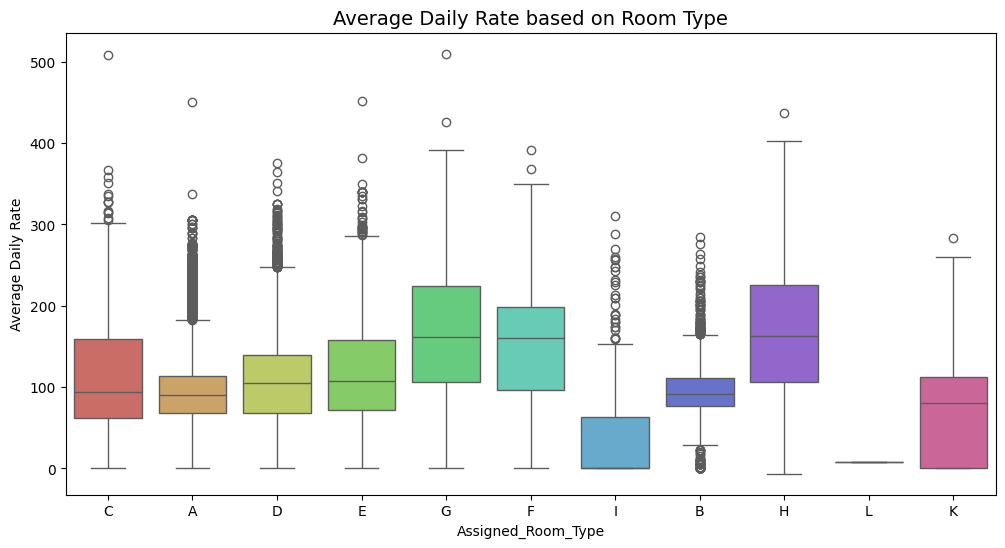

In [499]:
# plotting price with respective to their room type.

# specifying the size of the bar plot figure using matplotlib library.
plt.figure(figsize = (12,6))

# Using seaborn creating a boxplot of 'assigned_room_type' for x-axis and 'adr' for y-axis.
sns.boxplot(x = df['assigned_room_type'], y = df['adr'],palette='hls')

# providing title for the boxplot.
plt.title('Average Daily Rate based on Room Type',size=14)

# labelling x and y-axis.
plt.xlabel('Assigned_Room_Type')
plt.ylabel('Average Daily Rate')

# Using show() to display figures.
plt.show()

**The resulting box plot provides insight, as the costs for Room A and Room D are relatively reasonable. As a result, this room type attracts the most bookings.
Also, we can observe that the ADR for room types H, G, and C is high, hence these rooms will be booked in lower numbers.**

**Conclusion: To optimize revenue, hotels can add room types A, G, and H. Customers can also choose Rooms A and D for a more affordable price.**

### **Which country accounts for the majority of customers?**

In [500]:
# Filtering out reservations that are not cancelled
booked = df[df['is_canceled'] == 0]

# Selecting top 10 countries with their total booking counts.
booked = booked['country'].value_counts()[:10]

booked

country
PRT    20976
GBR     9668
FRA     8468
ESP     6383
DEU     6067
IRL     2542
ITA     2428
BEL     1868
NLD     1716
USA     1592
Name: count, dtype: int64

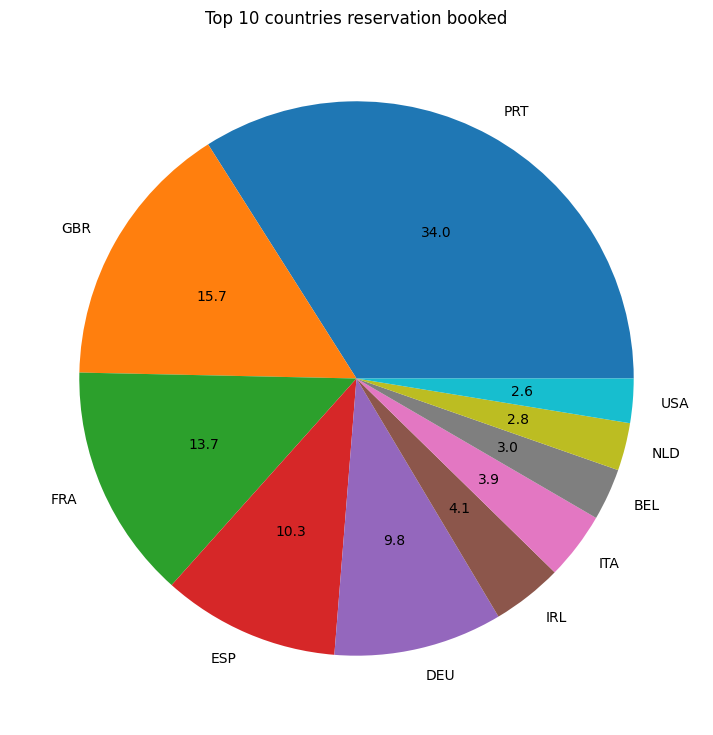

In [501]:
# plotting a pie chart to analyze which country has most bookings.

# specifying the size of the pie chart using matplotlib library.
plt.figure(figsize = (9,9))

# providing title for the piechart.
plt.title('Top 10 countries reservation booked')

# Using matplotlib creating a pie chart with 10 country booking percentage.
plt.pie(booked,autopct='%.1f',labels = booked.index)

# Using show() to display figures.
plt.show()

**The above pie chart shows that the majority of customers come from Portugal, the United Kingdom, and France.**

**Conclusion: Because some nations have a smaller percentage of bookings, hotels can offer unique discounts and marketing in these countries to promote bookings from these regions of the world.**

### **Which hotel has the highest revenue?**


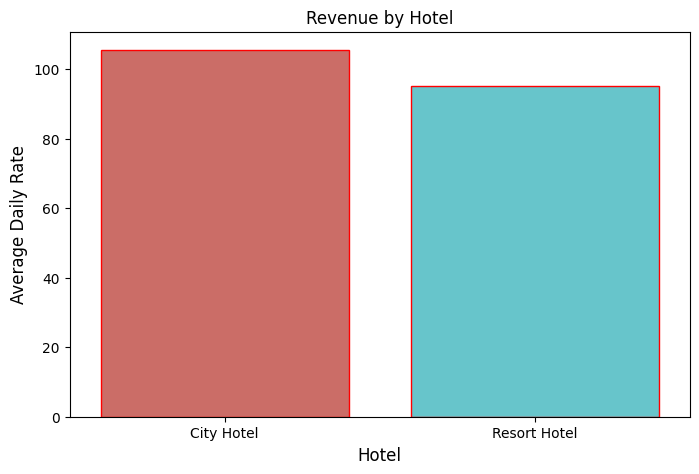

In [502]:
# plotting graph to analyze which hotel has highest revenue.

# grouping by dataframe based on hotel column.
grp_hotel = df.groupby('hotel')

# calulating mean of the adr on hotels and reseting the index for uniformity.
d = grp_hotel['adr'].agg(np.mean).reset_index()

# specifying the size of the bar plot figure using matplotlib library.
plt.figure(figsize = (8,5))

# Using seaborn creating a barplot of 'hotel' for x-axis and 'adr' for y-axis.
sns.barplot(x = d['hotel'], y = d['adr'], palette='hls',edgecolor = 'red')

# providing title for the barplot.
plt.title('Revenue by Hotel')

# labelling x and y-axis.
plt.xlabel('Hotel',size=12)
plt.ylabel('Average Daily Rate',size=12)

# Using show() to display figures.
plt.show()

**The average daily rate for a resort hotel is slightly lower than that of a city hotel. As a result, city hotels will see increased revenue.**

### **When is the average daily rate for hotels high?**

In [503]:
# Grouping by resort hotel based on reservation_status_date and getting mean adr
resort_hotel_adr = resort_hotel.groupby('reservation_status_date')[['adr']].mean()

# Grouping by city hotel based on reservation_status_date and getting mean adr
city_hotel_adr = city_hotel.groupby('reservation_status_date')[['adr']].mean()

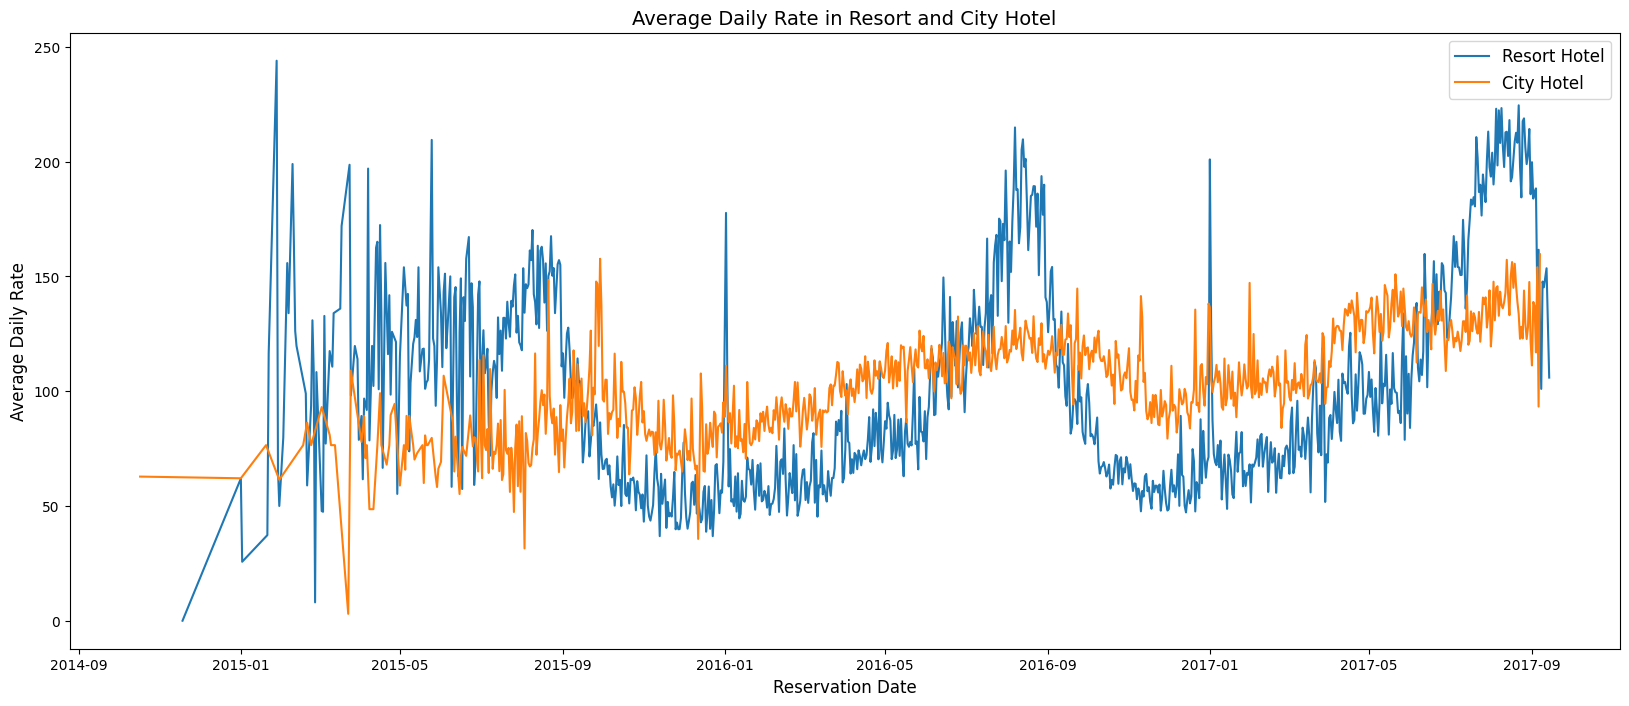

In [504]:
# specifying the size of the pie chart using matplotlib library.
plt.figure(figsize=(20,8))

# providing title for the lineplot and setting fontsize of the title.
plt.title('Average Daily Rate in Resort and City Hotel',fontsize = 14)

# plotting line graph based on resort hotel reservation_date on x-axis and adr on y-axis.
plt.plot(resort_hotel_adr.index,resort_hotel_adr['adr'],label='Resort Hotel')

# plotting line graph based on city hotel reservation_date on x-axis and adr on y-axis.
plt.plot(city_hotel_adr.index,city_hotel_adr['adr'],label='City Hotel')

#labelling x and y-axis.
plt.xlabel('Reservation Date',fontsize=12)
plt.ylabel('Average Daily Rate',fontsize = 12)

plt.legend(fontsize = 12)

# Using show() to display figures.
plt.show()

**The line graph above displays the average daily rate for city and resort hotels from 2014 to 2017. According to the data presented above, the price of city hotels has stayed consistent over time, whereas the price of resort hotels has risen over time.**
**We can conclude from this that, because resort hotels have higher costs, the number of bookings will be lower than for city hotels. Additionally, we can see that resort hotels have greater costs. Customers may be charged a hefty cancellation fee, therefore the frequency of cancellations at resort hotels will be smaller than at city hotels.**


**From this perspective, we recommend that resort hotels evaluate their prices so that the number of bookings can progressively increase.**


### **Which month has a higher amount of hotel bookings?**

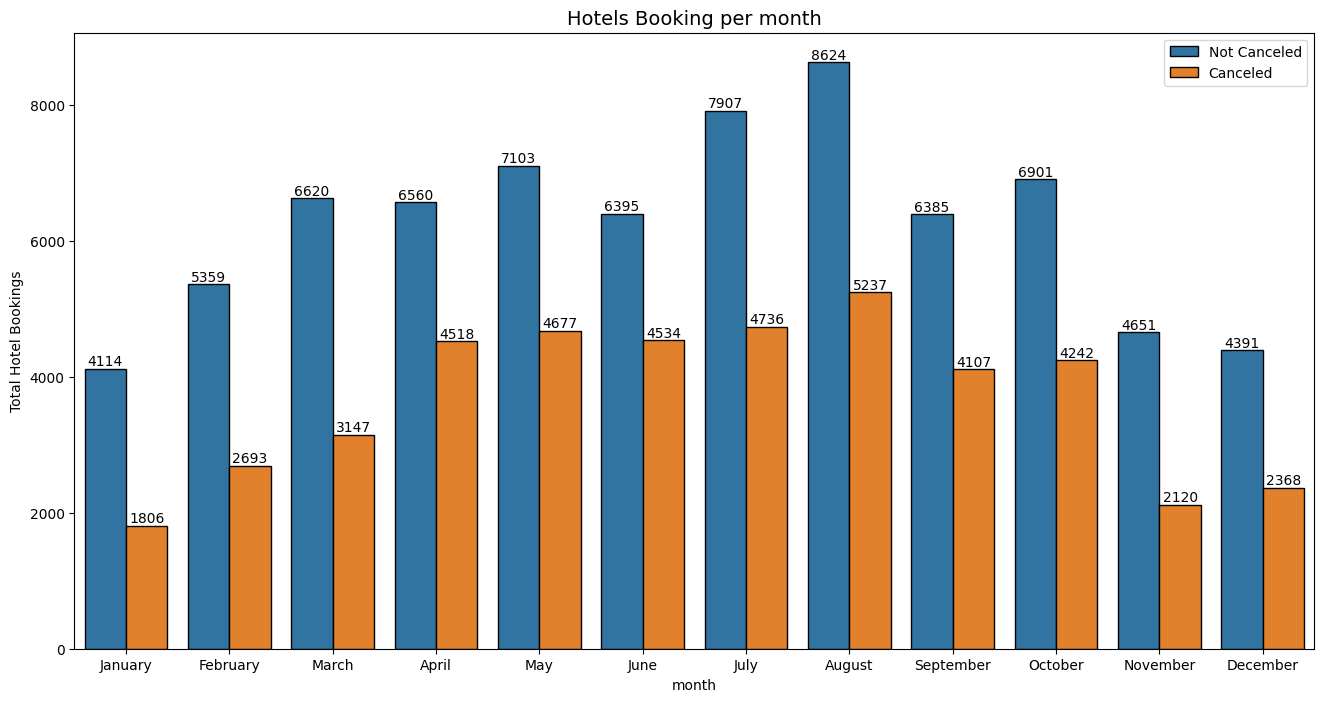

In [505]:

# Defining a list containing month names used for reindexing purposes (Stackoverflow).
reindex = ['January', 'February','March','April','May','June','July','August','September','October','November','December']

# creating a categorical column from arrival_date_month and using the specified month name and ensuring the ordering of month.
df['month'] = pd.Categorical(df['arrival_date_month'],categories=reindex,ordered=True)

# specifying the size of the pie chart using matplotlib library.
plt.figure(figsize=(16,8))

# Using seaborn creating a countplot of 'month' for x-axis and 'number of bookings' for y-axis.
ax = sns.countplot(x = 'month', data = df, hue='is_canceled',edgecolor = 'black')

# here we are labelling each bar with their actual number of bookings (Stackoverflow).
for container in ax.containers:
    ax.bar_label(container)

# providing title for the countplot.
plt.title('Hotels Booking per month',size = 14)

# labelling x and y-axis
plt.xlabel('month')
plt.ylabel('Total Hotel Bookings')

# setting legend for the chart
plt.legend(['Not Canceled','Canceled'])

# Using show() to display figures.
plt.show()

**The accompanying bar graph shows an increase in client arrivals in May, July, and August due to summer vacation.
Also, we can see that as the number of bookings increases in these months, the average daily fee of hotels should steadily rise. To confirm this, we would plot adr by month.**

### **Which month sees the highest average hotel revenue?**

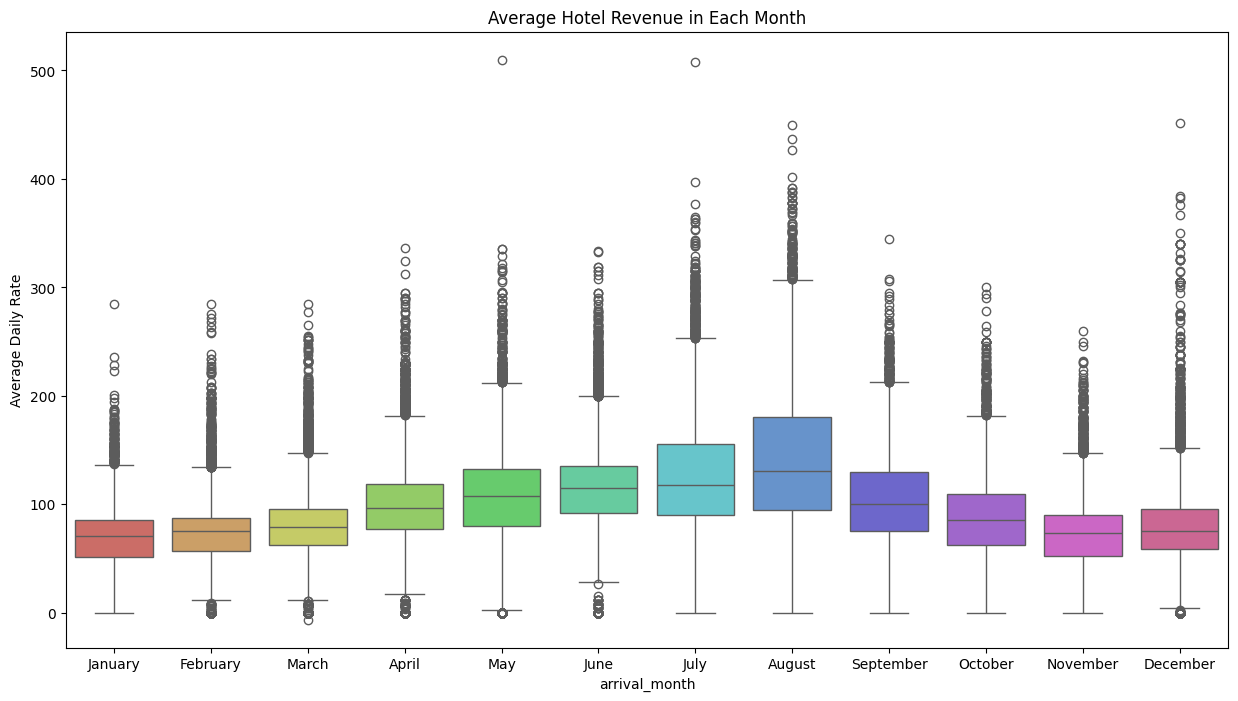

In [506]:
# specifying the size of the boxplot figure using matplotlib library.
plt.figure(figsize = (15,8))

# Using seaborn creating a boxplot of 'month' for x-axis and 'adr' for y-axis.
sns.boxplot(x = df['month'],y = df['adr'],palette = 'hls')

#labelling x and y-axis
plt.xlabel('arrival_month')
plt.ylabel('Average Daily Rate')

# providing title for the boxplot.
plt.title('Average Hotel Revenue in Each Month')

# Using show() to display figures.
plt.show()

**ADR grows from the beginning until the middle of the year, reaches a peak in
  August, and then falls till the end of the year. However, hotels generate significant revenue, particularly at the end of the year.**

**We can also see that customers made more bookings during these months, which raised the hotels' revenue.**


### **Which month has seen the highest hotel booking cancellation?**

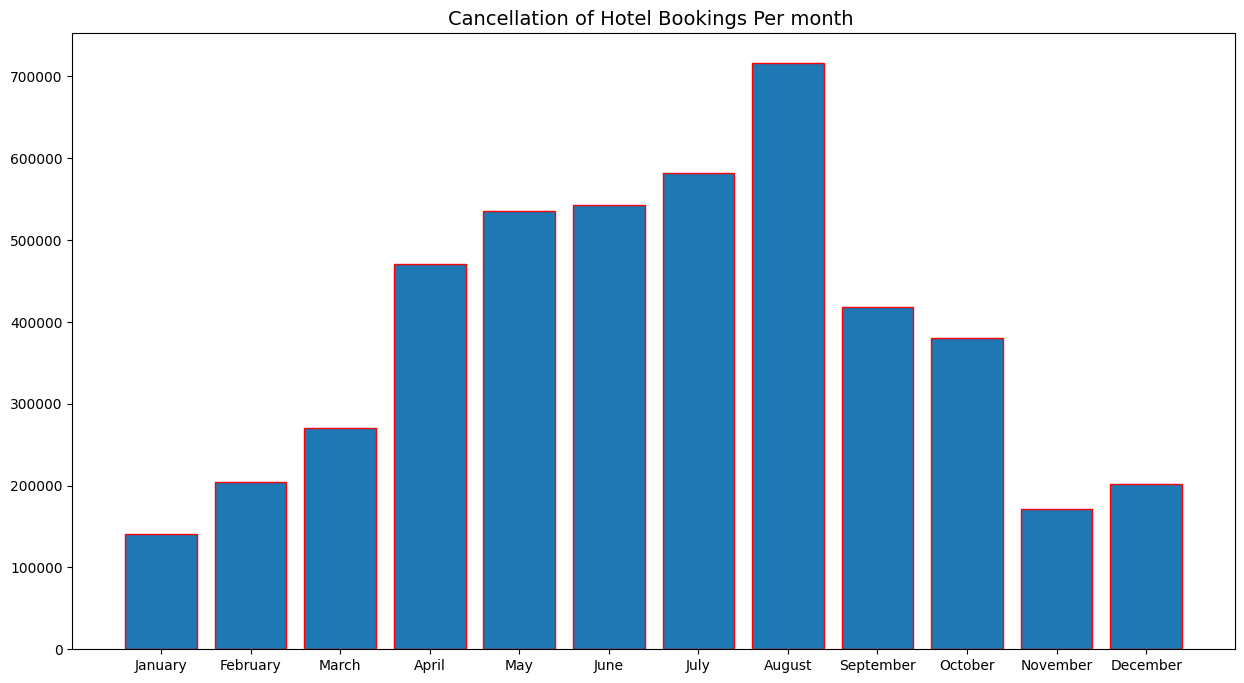

In [507]:
# specifying the size of the boxplot figure using matplotlib library.
plt.figure(figsize=(15,8))

# providing title for the barplot.
plt.title("Cancellation of Hotel Bookings Per month ",fontsize=14)

# Using matplotlib creating a barplot of 'month' for x-axis and 'adr' for y-axis where filtering out only cancelled bookings.
plt.bar('month','adr', data = df[df['is_canceled']==1].groupby('month')[['adr']].sum().reset_index(),edgecolor = 'red')

# Using show() to display figures.
plt.show()

**The bar plot above indicates monthly hotel booking cancellations. It shows that booking cancellations were high in May, July, and August. We can also conclude that increased bookings in these months required customers to be on a longer waiting list, resulting in a higher cancellation rate.**

### **Which month has the highest number of bookings?**


<Figure size 1200x800 with 0 Axes>

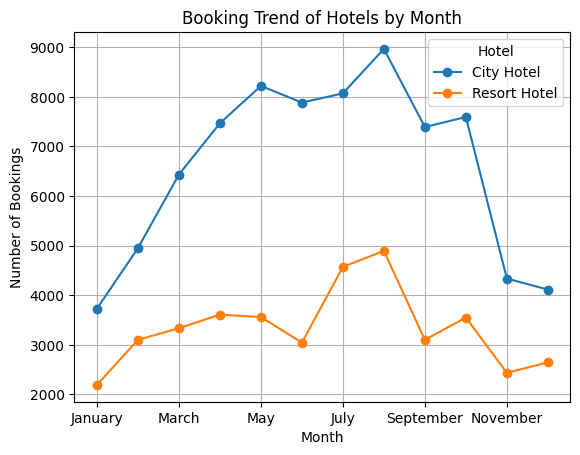

In [508]:
# Create a pivot table 'booking_counts_pivot' from the DataFrame df, with months as rows, hotel types as columns, and the count of bookings as values (stackoverflow).
booking_counts_pivot = df.pivot_table(index='month', columns='hotel', aggfunc='size')

# specifying the size of the boxplot figure using matplotlib library.
plt.figure(figsize=(12, 8))

# Plotting the booking trend for each hotel
booking_counts_pivot.plot(kind='line', marker='o', linestyle='-')

# providing title for the barplot.
plt.title('Booking Trend of Hotels by Month')

# labelling x and y-axis
plt.xlabel('Month')
plt.ylabel('Number of Bookings')

# rotating x-axis values to 360 degree
plt.xticks(rotation=360)

# providing legend with a title
plt.legend(title='Hotel')

# plotting a grid layout for the graph
plt.grid()

# Using show() to display figures.
plt.show()

**This figure shows that both hotels have higher bookings in August. We can also see that during these month, hotels generate bigger revenues.**

### **Which hotel does the customer think is the best for a longer stay?**

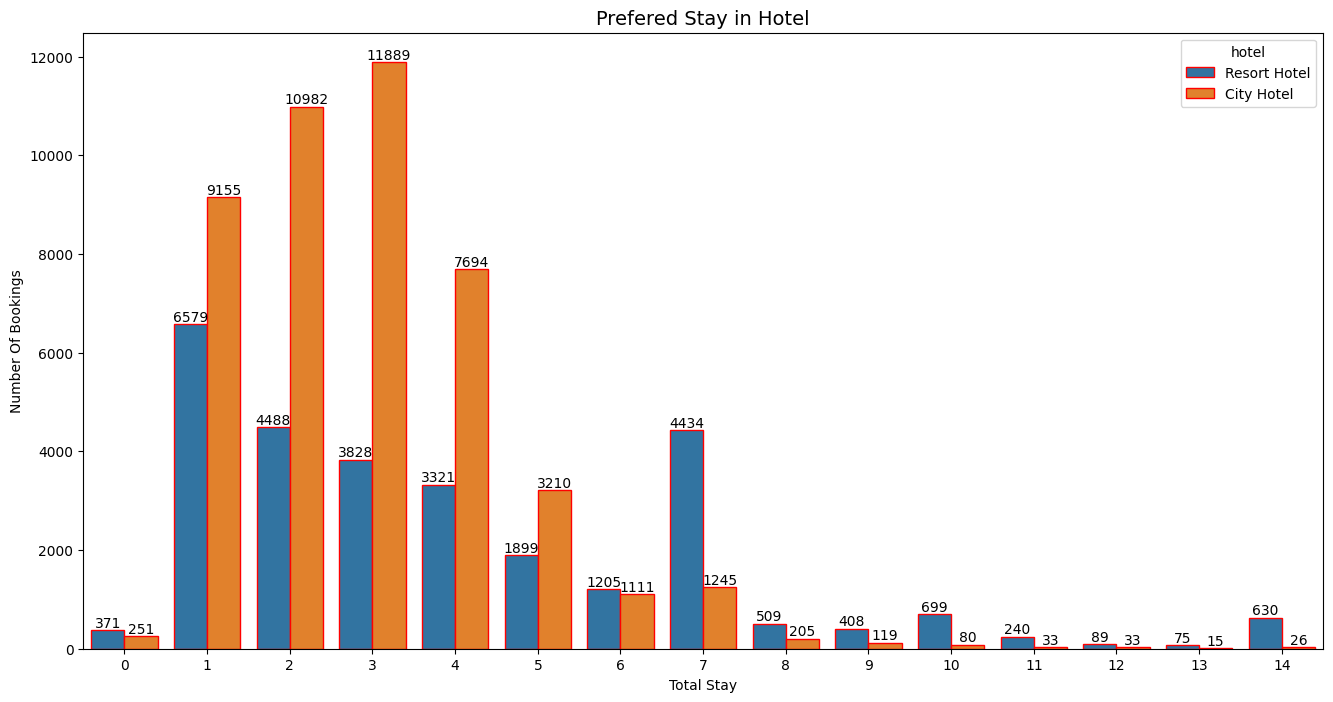

In [509]:
# Filtering the bookings that are not cancelled
booked = df[df['is_canceled'] == 0]

# Filtering Records again based on length of stay considering maximum 15 days
d1 = booked[booked['total_stay'] < 15]

# specifying the size of the countplot figure using matplotlib library.
plt.figure(figsize=(16,8))

# Using seaborn creating a countplot of 'total_stay' for x-axis and 'number of bookings' for y-axis.
ax = sns.countplot(x = d1['total_stay'], data = d1, hue=d1['hotel'],edgecolor = 'red')

# here we are labelling each bar with their actual number of bookings (Referenced by Stackoverflow).
for container in ax.containers:
    ax.bar_label(container)

# providing title for the countplot.
plt.title('Prefered Stay in Hotel',size = 14)

# labelling x and y-axis
plt.xlabel('Total Stay')
plt.ylabel('Number Of Bookings')

# Using show() to display figures.
plt.show()

**According to the graph above, city hotels are chosen for stays under four days, whereas resort hotels are preferred for longer stays. Resort hotels are more popular for vacation plans, therefore stays are typically longer, whereas city hotels are not as popular**

### **Which hotel has the longest lead time?**

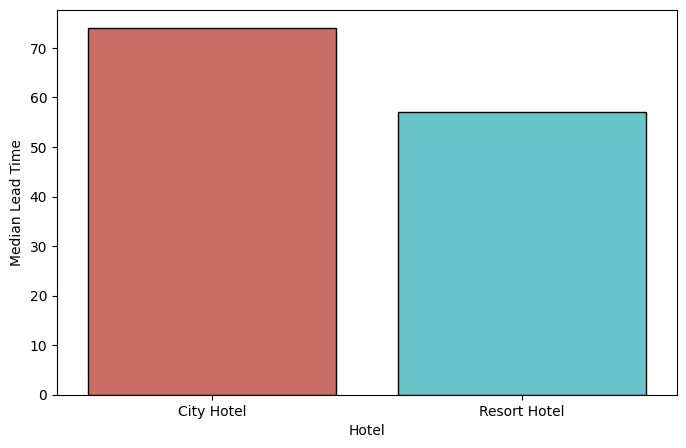

In [510]:
# Getting the meadian of lead_time of each hotel
d2 = grp_hotel['lead_time'].median().reset_index()

# specifying the size of the barplot figure using matplotlib library.
plt.figure(figsize = (8,5))

# Using seaborn creating a barplot of 'hotel' for x-axis and 'lead_time' for y-axis.
sns.barplot(x = d2['hotel'], y = d2['lead_time'] ,palette='hls',edgecolor = 'black')

# labelling x and y-axis
plt.xlabel('Hotel')
plt.ylabel('Median Lead Time')

# Using show() to display figures.
plt.show()

**The graph above indicates that the City Hotel's median lead time is somewhat longer. Additionally, the median lead time is noticeably longer in city hotel, indicating that guests typically schedule their hotel stays far in advance.**

### **Which hotel has the longest waiting time?**

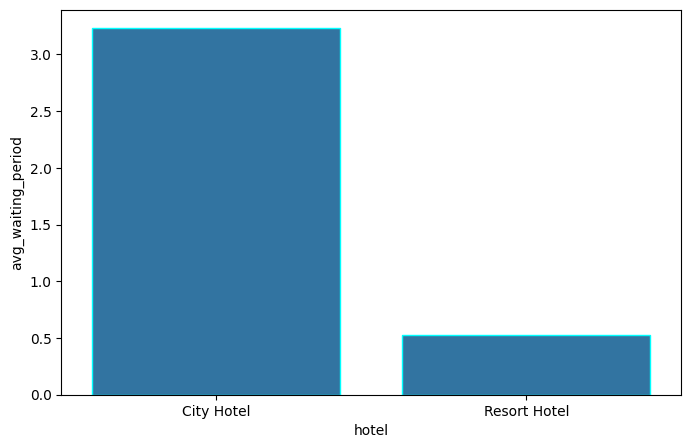

In [511]:
# Averaging the waiting list and renaming columns for better visualization (Referenced by Stack Overflow)
d5 = pd.DataFrame(grp_hotel['days_in_waiting_list'].agg(np.mean).reset_index().rename(columns = {'days_in_waiting_list':'avg_waiting_period'}))

# specifying the size of the barplot figure using matplotlib library.
plt.figure(figsize = (8,5))

# Using seaborn creating a barplot of 'hotel' for x-axis and 'average waiting period' for y-axis.
sns.barplot(x = d5['hotel'], y = d5['avg_waiting_period'],edgecolor = 'cyan' )

# Using show() to display figures.
plt.show()

**As can be seen from the graph above, City Hotel is substantially busier than Resort Hotel because of its noticeably longer wait times.**

### **How many reservations does each hotel have?**

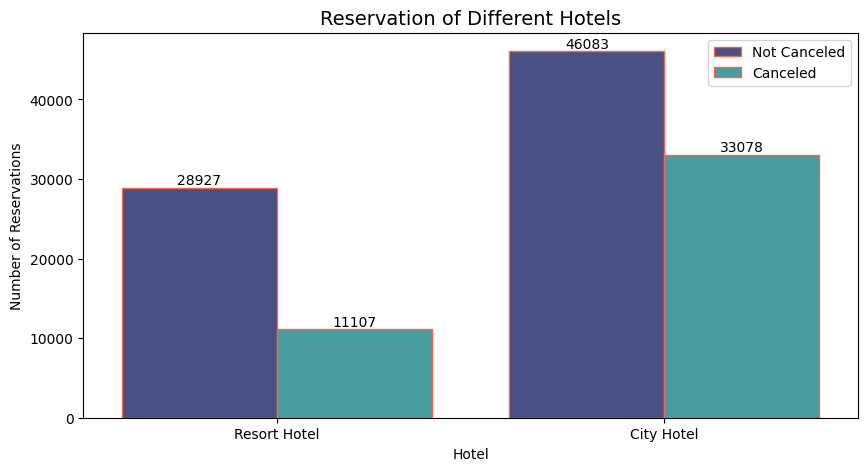

In [512]:
# specifying the size of the countplot figure using matplotlib library.
plt.figure(figsize=(10,5))

# Using seaborn creating a barplot of 'hotel' for x-axis and 'number of reservations' for y-axis.
ax = sns.countplot(x ='hotel', hue = 'is_canceled', data = df , palette= 'mako',edgecolor = 'tomato')

# here we are labelling each bar with their actual number of bookings (Referenced by Stackoverflow).
for container in ax.containers:
    ax.bar_label(container)


# providing title for the barplot.
plt.title('Reservation of Different Hotels',size = 14)

# labelling x and y-axis
plt.xlabel('Hotel')
plt.ylabel('Number of Reservations')

# providing legend with a title
plt.legend(['Not Canceled','Canceled'])

# Using show() to display figures.
plt.show()

**The above graph indicates that there are more cancellations at the City Hotel than at the Resort Hotel.**

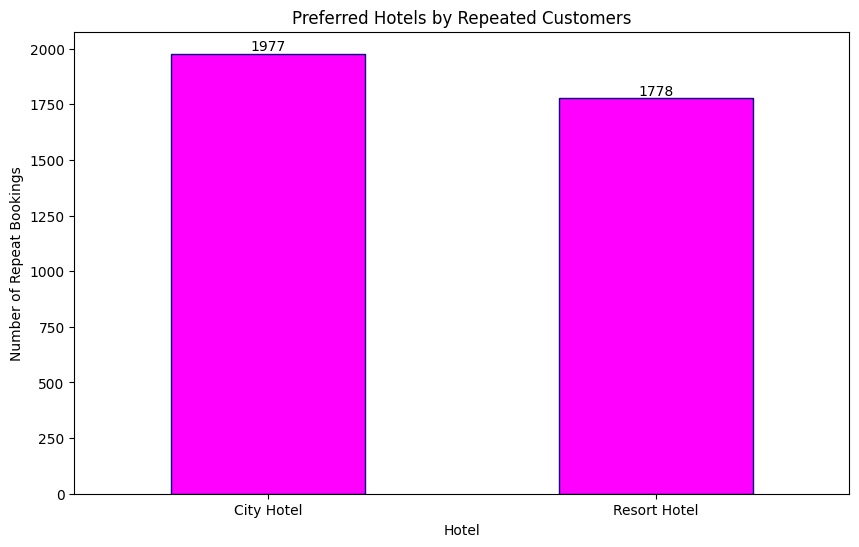

In [513]:
# Filter for repeat bookings.
repeated_bookings = df[df['is_repeated_guest'] == 1]

# Grouping by hotel and counting the number of repeat bookings for each hotel.
hotel_preference = repeated_bookings['hotel'].value_counts()

# specifying the size of the barplot figure using matplotlib library.
plt.figure(figsize=(10, 6))

# Using seaborn creating a barplot of 'hotel' for x-axis and 'number of repeat bookings' for y-axis.
ax = hotel_preference.plot(kind='bar', color='magenta',edgecolor = 'navy')

# here we are labelling each bar with their actual number of bookings (Referenced by Stackoverflow).
for container in ax.containers:
    ax.bar_label(container)

# providing title for the barplot.
plt.title('Preferred Hotels by Repeated Customers')

# labelling x and y-axis
plt.xlabel('Hotel')
plt.ylabel('Number of Repeat Bookings')

# rotating x axis labels with 360 degree
plt.xticks(rotation=360)

# Using show() to display figures.
plt.show()

### **How many reservations are booked again each year?**

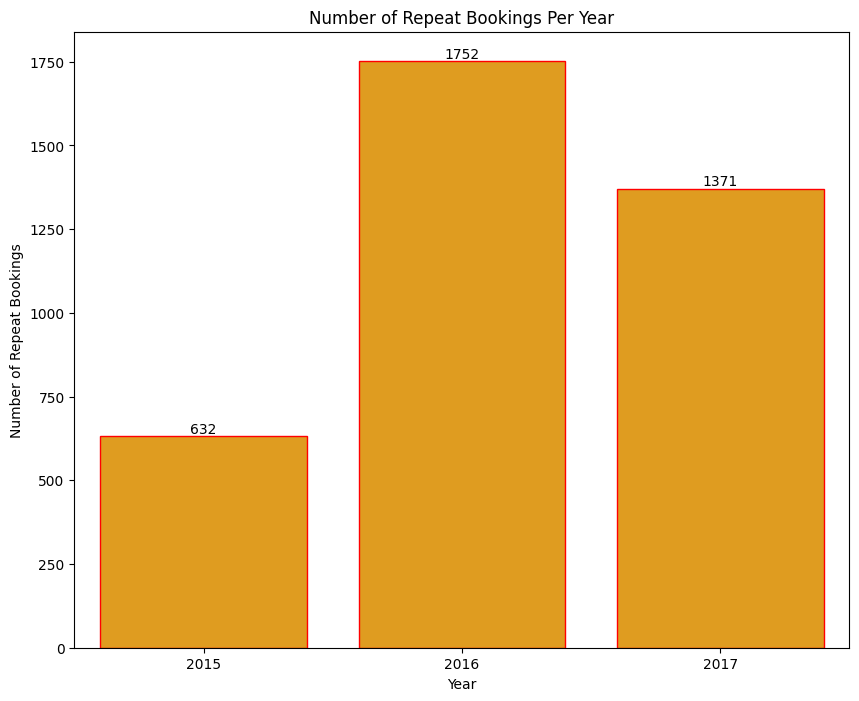

In [514]:
# Grouping by arrival date year based on repeated bookings.
repeated_bookings_per_year = repeated_bookings.groupby('arrival_date_year').size()

# specifying the size of the barplot figure using matplotlib library.
plt.figure(figsize=(10,8))

# Using seaborn creating a barplot of 'year' for x-axis and 'number of repeat bookings' for y-axis.
ax = sns.barplot(x = repeated_bookings_per_year.index, y = repeated_bookings_per_year, color = 'orange' ,edgecolor = 'red')

# here we are labelling each bar with their actual number of bookings (Referenced by Stackoverflow).
for container in ax.containers:
    ax.bar_label(container)

# providing title for the barplot.
plt.title('Number of Repeat Bookings Per Year')

# labelling x and y-axis
plt.xlabel('Year')
plt.ylabel('Number of Repeat Bookings')

# Using show() to display figures.
plt.show()

**We can observe from the plot above that there was an increase in customer retention in 2016.**


### **What is the overall number of bookings each year?**

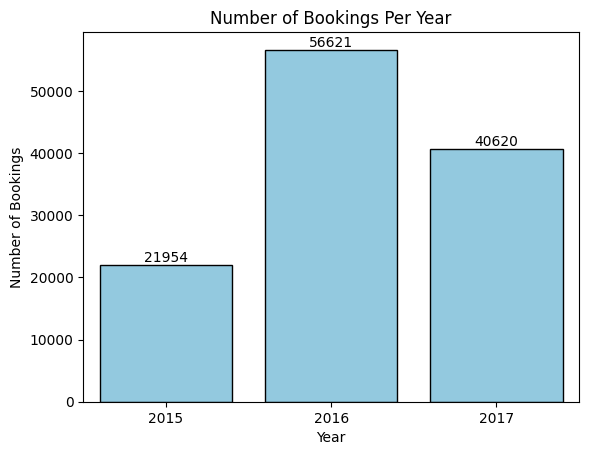

In [515]:
# Plotting number of graphy by grouping them by each year.

bookings_per_year = df.groupby('arrival_date_year').size()

ax = sns.barplot(x = bookings_per_year.index,  y = bookings_per_year, color = 'skyblue',edgecolor = 'black')

for container in ax.containers:
    ax.bar_label(container)

plt.title('Number of Bookings Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Bookings')
plt.show()

**The above figure shows that in 2016, hotels had the highest booking rate.**


### **Which deposit type do most consumers prefer?**

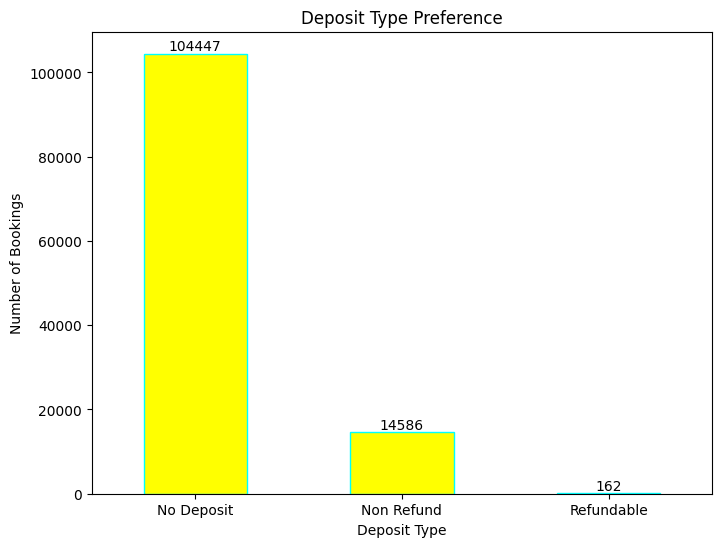

In [516]:
# Grouping by deposit type and counting the number of bookings for each type
deposit = df['deposit_type'].value_counts()

plt.figure(figsize=(8, 6))

ax = deposit.plot(kind = 'bar',color = 'yellow',edgecolor = 'cyan')

for container in ax.containers:
    ax.bar_label(container)

plt.title('Deposit Type Preference')
plt.xlabel('Deposit Type')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=360)
plt.show()

**The above bar plot depicts the deposit types preferred by customers. According to the above plot, the majority of consumers chose 'No deposit' as their deposit type since everyone wants the same level of certainty and no one wants to make a deposit or pay in advance.**

### **Which hotel is most popular among customers for a weekend stay?**

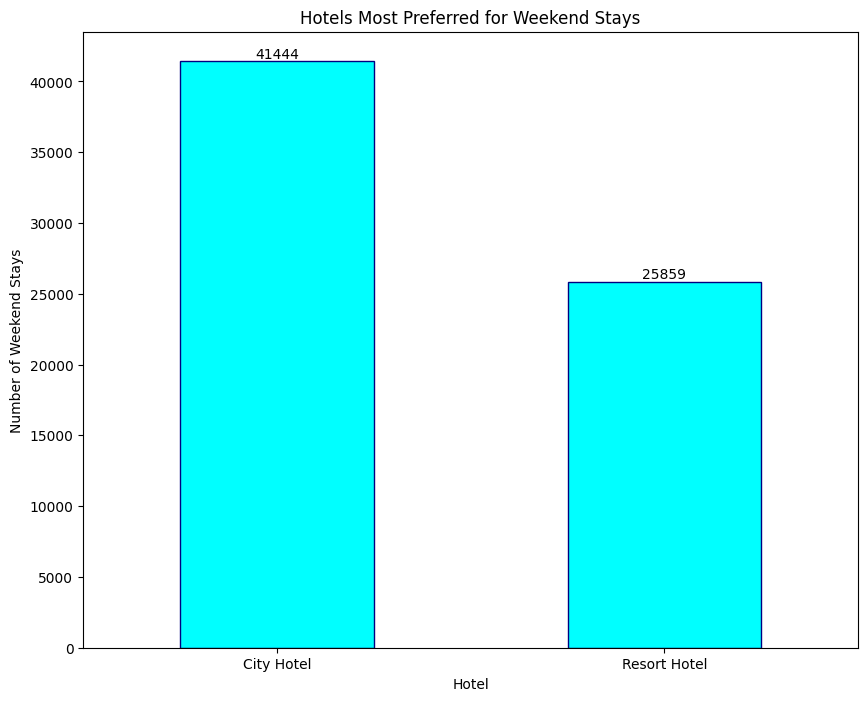

In [517]:
# Filtering weekend bookings

weekend_booking = df[df['stays_in_weekend_nights'] > 0]

# Grouping by hotel and counting the number of weekend bookings for each hotel
weekend_stay = weekend_booking['hotel'].value_counts()

# Plotting
plt.figure(figsize=(10, 8))
ax = weekend_stay.plot(kind='bar', color='cyan',edgecolor = 'navy')

for container in ax.containers:
  ax.bar_label(container)

plt.title('Hotels Most Preferred for Weekend Stays')
plt.xlabel('Hotel')
plt.ylabel('Number of Weekend Stays')
plt.xticks(rotation=360)
plt.show()

**The City Hotel is the popular place to stay on weekends.**

### **Does the customer's particular request affect the average daily rate?**

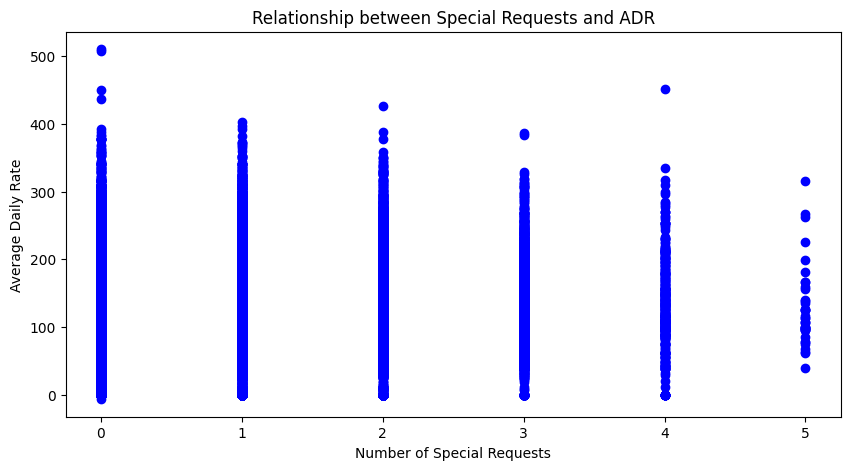

In [518]:
#plotting scatter for comparison of special request and ADR
plt.figure(figsize=(10, 5))
plt.scatter(df['total_of_special_requests'], df['adr'], color='blue')
plt.title('Relationship between Special Requests and ADR')
plt.xlabel('Number of Special Requests')
plt.ylabel('Average Daily Rate')
plt.show()

**The corresponding plot shows that when the number of exceptional requests increases, the average daily charge lowers.**

### **Which particular type of meal does the customers prefer the most?**


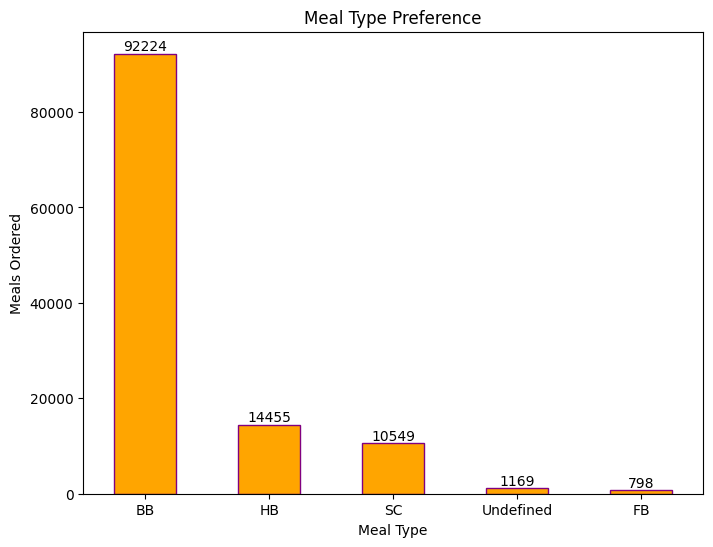

In [519]:
# Grouping by deposit type and counting the number of bookings for each type
meal_type = df['meal'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))

ax = meal_type.plot(kind = 'bar',color = 'orange',edgecolor = 'purple')

for container in ax.containers:
    ax.bar_label(container)

plt.title('Meal Type Preference')
plt.xlabel('Meal Type')
plt.ylabel('Meals Ordered')
plt.xticks(rotation=360)
plt.show()

**The above graph indicates the meal type preference chosen by most customers. According to the graph above, bed and breakfast is the most popular meal type among customers, followed by half-board meals.**

### **User Interactive Visualizations**

Enter the year (e.g., 2015, 2016, 2017): 2016


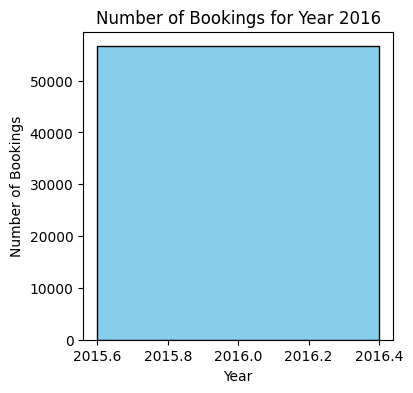

In [520]:
def plot_bookings_for_year(df, year):
    # Filter DataFrame for the specified year
    year_df = df[df['arrival_date_year'] == year]

    # Count the number of bookings for the specified year
    bookings_count = year_df.shape[0]

    # Plotting
    plt.figure(figsize=(4, 4))
    plt.bar(year, bookings_count, color='skyblue', edgecolor='black')
    plt.title('Number of Bookings for Year ' + str(year))
    plt.xlabel('Year')
    plt.ylabel('Number of Bookings')
    plt.show()

# Interactive user input for year
year = int(input("Enter the year (e.g., 2015, 2016, 2017): "))

# Plotting based on user input
plot_bookings_for_year(df, year)

Enter the depsoit type (e.g., 0: 'No Deposit', 1: 'Non Refund', 2: 'Refundable'): 1
14586


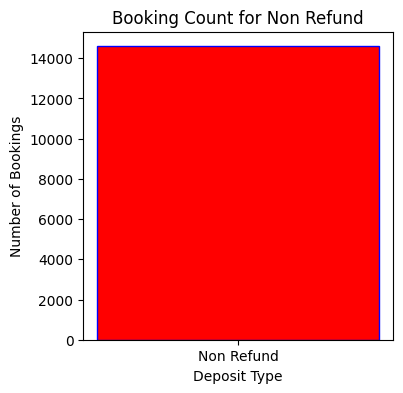

In [521]:

def deposit_type_plot(deposit_type):

  deposit_df = df[df['deposit_type'] == deposit_type]

  booking_count = deposit_df.shape[0]

  print(booking_count)

# Plotting
  plt.figure(figsize=(4, 4))
  plt.bar(deposit_type, booking_count, color='red', edgecolor='blue')
  plt.title(f'Booking Count for {deposit_type}')
  plt.xlabel('Deposit Type')
  plt.ylabel('Number of Bookings')
  plt.show()

# Interactive user input for column name
deposit_type = input("Enter the depsoit type (e.g., 0: 'No Deposit', 1: 'Non Refund', 2: 'Refundable'): ")

if deposit_type == '0':
  deposit_type = 'No Deposit'
elif deposit_type == '1':
  deposit_type = 'Non Refund'
else:
  deposit_type = 'Refundable'

# Plotting based on user input
deposit_type_plot(deposit_type)

Enter the meal type (e.g., 'BB', 'FB', 'HB'): BB
92224


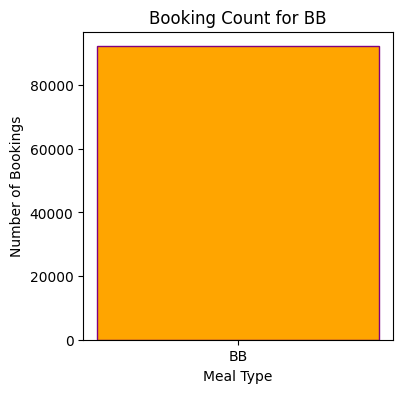

In [522]:
# Grouping by deposit type and counting the number of bookings for each type


def meal_booking_plot(meal_type):

  meal_df = df[df['meal'] == meal_type]

  booking_count = meal_df.shape[0]

  print(booking_count)

# Plotting
  plt.figure(figsize=(4, 4))
  plt.bar(meal_type, booking_count, color='orange', edgecolor='purple')
  plt.title(f'Booking Count for {meal_type}')
  plt.xlabel('Meal Type')
  plt.ylabel('Number of Bookings')
  plt.show()

# Interactive user input for column name
meal_type = input("Enter the meal type (e.g., 'BB', 'FB', 'HB'): ")

# Plotting based on user input
meal_booking_plot(meal_type)

## MODEL BUILDING

In [523]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119195 entries, 0 to 119389
Data columns (total 35 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119195 non-null  object        
 1   is_canceled                     119195 non-null  int64         
 2   lead_time                       119195 non-null  int64         
 3   arrival_date_year               119195 non-null  int64         
 4   arrival_date_month              119195 non-null  object        
 5   arrival_date_week_number        119195 non-null  int64         
 6   arrival_date_day_of_month       119195 non-null  int64         
 7   stays_in_weekend_nights         119195 non-null  int64         
 8   stays_in_week_nights            119195 non-null  int64         
 9   adults                          119195 non-null  int64         
 10  children                        119195 non-null  int64       

### **Label Encoding**

In [524]:
# Encoding Object(String) columns with LabelEncoder for data modelling purpose.

le = LabelEncoder()

# Target column
target_column = 'is_canceled'

l = ["hotel","arrival_date_month","market_segment","distribution_channel","meal","reserved_room_type","deposit_type","customer_type"]

for col in l:
  df[col] = le.fit_transform(df[col])

**I used a label encoder to transform category variables to numerical kinds, as these columns are required for model training. These columns are organized at different levels, or ordinality. As a result, a label encoder is better suited for encoding these columns than a single hot encoder.**

### **Random Forest Classifier**

In [525]:
# Extracting features and target variable

X = df[["hotel","arrival_date_month","market_segment","distribution_channel","customer_type",'adr','stays_in_weekend_nights','stays_in_week_nights','lead_time','is_repeated_guest','previous_bookings_not_canceled','total_of_special_requests','agent']]

y = df[target_column]


# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize the model

model = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the model
start_time = time.time()

model.fit(X_train, y_train)


# Make predictions
y_pred = model.predict(X_test)

end_time = time.time()

total_time_rfc = end_time - start_time

# Evaluate the model
accuracy_test_rfc = accuracy_score(y_test, y_pred)

print("Accuracy of Random Forest Classifier:", accuracy_test_rfc)

print("Total time taken for taining and prediction:", total_time_rfc)

Accuracy of Random Forest Classifier: 0.855027475984731
Total time taken for taining and prediction: 12.737266540527344


**For my initial model, I utilized a random forest classifier. In our situation, as we check depending on the provided input parameters, is the hotel reservation cancelled or not?**

**I have considered input columns such as hotel, adr, stays_in_week_nights, is_repeated_guest, stays_in_weekend nights and few other columns as they are directly impacting the Is_cancelled output from the above EDA analysis.**

**For this project, using a random forest classifier has several advantages, including increased accuracy, adaptability to handle different kinds of data, and preventing of overfitting of data. In this project to classify or for prediction of hotel booking status we utilize this model.
However, one disadvantage of this model is that it requires the majority of attributes to train the model for greater accuracy, which takes significantly longer time than other models.**
  

**This model provides an accuracy score of 85%.**

### **DecisionTree Classifier**

In [526]:
# Extracting features and target variable

X = df[["hotel","market_segment","customer_type","adr","stays_in_weekend_nights","stays_in_week_nights","lead_time","is_repeated_guest",'previous_bookings_not_canceled','total_of_special_requests','agent']]

# "arrival_date_month","market_segment","distribution_channel","customer_type",'adr','stays_in_weekend_nights','stays_in_week_nights','lead_time','is_repeated_guest','previous_bookings_not_canceled','total_of_special_requests','agent'

y = df[target_column]


# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize the model

model = DecisionTreeClassifier()


# Train the model
start_time = time.time()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
end_time = time.time()
total_time_dtc = end_time - start_time

# Evaluate the model
accuracy_test_dtc = accuracy_score(y_test, y_pred)

print("Accuracy of Decision Tree Classifier:", accuracy_test_dtc)

print("Total time taken for taining and prediction:", total_time_dtc)

Accuracy of Decision Tree Classifier: 0.8043961575569445
Total time taken for taining and prediction: 0.42642688751220703


**A decision tree classifier is a classification model based on the decision tree algorithm. We used this algorithm to forecast whether a hotel reservation would be canceled or not. In comparison to the Random Forest classifier model, we used extremely few columns to train the model. However, in this model, accuracy is dropped by 5%, or around 80%. However, the processing time is shorter when compared to the Random Forest Classifier.**

### **Logistic Regression**

In [527]:
# Extracting features and target variable

X = df[["hotel","adr",'lead_time','total_of_special_requests','market_segment','customer_type']]


# "arrival_date_month","market_segment","distribution_channel","customer_type",'adr','stays_in_weekend_nights','stays_in_week_nights','lead_time','is_repeated_guest','previous_bookings_not_canceled','total_of_special_requests','agent'

y = df[target_column]


# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize the model

model = LogisticRegression()

# Train the model
start_time = time.time()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
end_time = time.time()
total_time_lr = end_time - start_time

# Evaluate the model
accuracy_test_lr = accuracy_score(y_test, y_pred)

print("Accuracy of Logistic Regression model:", accuracy_test_lr)

print("Total time taken for taining and prediction:", total_time_lr)

Accuracy of Logistic Regression model: 0.7120265111791602
Total time taken for taining and prediction: 0.7425136566162109


**Logistic regression is another approach that can assist predict whether or not a hotel will be canceled. This model can output binary values. So, this model is appropriate for the project. However, when we compare this model to the other models, we notice a significant decrease in accuracy. So, we can conclude that this model is inefficient when compared to other models. Only a few columns that have a direct impact on the output column are taken into account when designing this model. When we use the trial-and-error procedure on the remaining columns, the model obtains the same accuracy as with less columns, approximately 71%. In terms of processing time, this model outperforms than Random Forest Classifier model**

In [528]:
# Comparison of Different Model accuracy (Referenced google and Stackoverflow)

model_results = {
    "Model Name": ["Random Forest Classifier", "Decision Tree Classifier", "Logistic Regression"],
    "Accuracy Score": [accuracy_test_rfc, accuracy_test_dtc, accuracy_test_lr],
    "Total Time":[total_time_rfc, total_time_dtc, total_time_lr]
}

df_compare = pd.DataFrame(model_results)

# Print header
print("Different Model Predictions")
print()

# Print top line
print("-" * 65)

# Print table header
print("{:<30s} {:<20s} {:<20s}".format("Model Name", "Accuracy Score", "Total Time"))

# Print line separating header and table
print("-" * 65)

# Print table content
for index, row in df_compare.iterrows():
    print("{:<30s} {:<20f} {:<20f}".format(row["Model Name"], row["Accuracy Score"], row["Total Time"]))

# Print bottom line
print("-" * 65)


Different Model Predictions

-----------------------------------------------------------------
Model Name                     Accuracy Score       Total Time          
-----------------------------------------------------------------
Random Forest Classifier       0.855027             12.737267           
Decision Tree Classifier       0.804396             0.426427            
Logistic Regression            0.712027             0.742514            
-----------------------------------------------------------------


**The above output displays various model accuracy and the time required to train the data and anticipate the output for testing the data. The output shows that the random forest classifier model has higher accuracy but requires more time to train and forecast the outcome. However, the decision tree classifier achieves 80% accuracy while taking the least amount of time to train the model. However, logistic regression has lower accuracy than both models while taking somewhat less time than the random forest classifier model.**



**I believe the decision tree classifier is the best model for this project due to its accuracy and processing speed. It has roughly 80% accuracy, which is superior, and it takes the shortest time to process the model, which is a benefit for any model that achieves both.**